### Term Frequency

<AxesSubplot:>

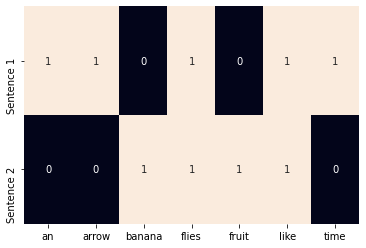

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies like an arrow",
         "Fruit flies like a banana"]

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()

sns.heatmap(one_hot, annot=True, 
           cbar=False, xticklabels=vocab,
           yticklabels=["Sentence 1", "Sentence 2"])

### TF-IDF Representation
- IDF : Inverse-Document-Frequency
- 해당 문서에만 등장하는 단어가 중요단어라는 가정. 드문 토큰의 점수를 높게한다. 

<AxesSubplot:>

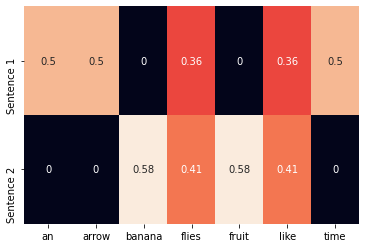

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, 
           cbar=False, xticklabels=vocab,
           yticklabels=["Sentence 1", "Sentence 2"])

### pytorch로 Tensor 다루기

In [17]:
def describe(x):
    print("타입 : {}".format(x.type()))
    print("크기 : {}".format(x.shape))
    print("값 : {}".format(x)) 

#### tensor 생성하기

In [30]:
import torch

describe(torch.Tensor(2,3))

# 랜덤 초기화
## 균등분포
describe(torch.rand(2,3))
## 표준정규분포
describe(torch.randn(2,3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[0.4899, 0.6865, 0.6288],
        [0.3737, 0.0101, 0.4498]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[0.3672, 1.9622, 1.1769],
        [0.6963, 0.1883, 0.8003]])


In [31]:
# 스칼라 값으로 초기화
describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [32]:
# 리스트로 텐서만들기
x = torch.tensor([[1,2,3],
                 [4,5,6]])

describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[1, 2, 3],
        [4, 5, 6]])


In [34]:
# numpy로 텐서만들기
import numpy as np

npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

타입 : torch.DoubleTensor
크기 : torch.Size([2, 3])
값 : tensor([[0.1225, 0.3456, 0.8341],
        [0.3395, 0.8659, 0.2705]], dtype=torch.float64)


#### 텐서의 타입과 크기

In [36]:
x = torch.FloatTensor([[1,2,3],
                      [4,5,6]])

describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [37]:
x = x.long()
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[1, 2, 3],
        [4, 5, 6]])


In [41]:
x = torch.tensor([[1,2,3],
                 [4,5,6]], dtype=torch.int32)
describe(x)

타입 : torch.IntTensor
크기 : torch.Size([2, 3])
값 : tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [42]:
x = x.float()
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### 텐서 연산

In [45]:
x = torch.randn(3,2)
describe(x)

describe(torch.add(x,x)) # element-wise add

describe(x + x)

타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : tensor([[-1.0569, -2.5825],
        [ 0.0973, -0.3154],
        [ 1.3468,  0.5846]])
타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : tensor([[-2.1137, -5.1650],
        [ 0.1946, -0.6307],
        [ 2.6937,  1.1691]])
타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : tensor([[-2.1137, -5.1650],
        [ 0.1946, -0.6307],
        [ 2.6937,  1.1691]])


In [61]:
x = torch.arange(6)
describe(x)

x = x.view(2,3)
describe(x)

describe(torch.sum(x, dim=0)) # element-wise by row

describe(torch.sum(x, dim=1)) # element-wise by columns

describe(torch.transpose(x, 0, 1)) ## 0차원과 1차원을 바꿔라 : (2,3) -> (3,2)

타입 : torch.LongTensor
크기 : torch.Size([6])
값 : tensor([0, 1, 2, 3, 4, 5])
타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([3])
값 : tensor([3, 5, 7])
타입 : torch.LongTensor
크기 : torch.Size([2])
값 : tensor([ 3, 12])
타입 : torch.LongTensor
크기 : torch.Size([3, 2])
값 : tensor([[0, 3],
        [1, 4],
        [2, 5]])


#### 인덱싱, 슬라이싱, 연결

In [71]:
x = torch.arange(6).view(2,3)
describe(x)

describe(x[:1, :2])

describe(x[0, 1])

indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices)) # dim=1 -> column 중에서, index=[0,2]를 뽑아라

indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim=0, index=indices)) # dim=0 -> row 중에서, index=[0,0]를 뽑아라

row_indices = torch.arange(2).long() #[0,1]
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices]) # [0,0] & [1,1]

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([1, 2])
값 : tensor([[0, 1]])
타입 : torch.LongTensor
크기 : torch.Size([])
값 : 1
타입 : torch.LongTensor
크기 : torch.Size([2, 2])
값 : tensor([[0, 2],
        [3, 5]])
타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[0, 1, 2],
        [0, 1, 2]])
타입 : torch.LongTensor
크기 : torch.Size([2])
값 : tensor([0, 4])


In [76]:
# 텐서 연결

x = torch.arange(6).view(2,3)
describe(x)

describe(torch.cat([x,x], dim=0))

describe(torch.cat([x,x], dim=1))

describe(torch.stack([x,x])) # 상위 차원이 추가됨

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : tensor([[0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([4, 3])
값 : tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([2, 6])
값 : tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([2, 2, 3])
값 : tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [86]:
# 행렬 곱

x1 = torch.arange(6).view(2,3)
x1 = torch.as_tensor(x1, dtype=torch.float32)
describe(x1)

x2 = torch.ones(3,2)
x2[:,1] += 1
describe(x2)

describe(torch.mm(x1, x2))


타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : tensor([[ 3.,  6.],
        [12., 24.]])


#### 텐서와 계산 그래프

In [94]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)

y = (x + 2) * (x + 5) + 3
describe(y)

z = y.mean()
describe(z)
z.backward()

print(x.grad is None)

타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
타입 : torch.FloatTensor
크기 : torch.Size([])
값 : 21.0
False


#### CUDA 텐서

In [101]:
# cuda은 nvidia GPU에서만 지원

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 연습문제

In [143]:
# 1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요

x = torch.ones(2,3)
describe(x)
x = x.unsqueeze(0)
describe(x)

# 2. 이전 텐서에 추가한 차원을 삭제하세요
x = x.squeeze(0)
describe(x)

# 3. 범위가 [3,7)이고 크기가 5*3인 랜덤한 텐서를 만드세요
npy = np.random.rand(5,3) * (7-3)
x = torch.tensor(npy, dtype=torch.float64)
describe(x)

# 4. 정규분포를 사용해 텐서를 만드세요
x = torch.randn((3,2))
describe(x)

# 5. 텐서 torch.Tensor([1, 1, 1, 0, 1])에서 0이 아닌 원소의 인덱스를 추출하세요
x = torch.Tensor([1, 1, 1, 0, 1])
torch.nonzero(x)

# 6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요
x = torch.Tensor(3,1)
x = torch.stack([x,x,x,x])
describe(x)

# 7. 2차원 행렬 두개의 배치 행렬 곱셈을 계산하시오
x = torch.rand(3,4,5)
y = torch.rand(3,5,4)

z = torch.bmm(x,y)
describe(z)

# 8. 3차원 행렬과 2차원 행렬의 배치 행렬 곱셈을 계산하시오
x = torch.rand(3,4,5)
y = torch.rand(5,4)

z = torch.bmm(x, y.unsqueeze(0).expand(x.size(0), *y.size()))
describe(z)


타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입 : torch.FloatTensor
크기 : torch.Size([1, 2, 3])
값 : tensor([[[1., 1., 1.],
         [1., 1., 1.]]])
타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입 : torch.DoubleTensor
크기 : torch.Size([5, 3])
값 : tensor([[1.4355, 0.6062, 1.6022],
        [2.9753, 2.0530, 3.4063],
        [2.5424, 3.9850, 3.4173],
        [1.5799, 2.0703, 2.8027],
        [0.3183, 0.7218, 3.2113]], dtype=torch.float64)
타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : tensor([[ 1.3830, -1.8450],
        [-0.7944,  1.8517],
        [ 0.4394,  2.1052]])
타입 : torch.FloatTensor
크기 : torch.Size([4, 3, 1])
값 : tensor([[[ 1.3906e+00],
         [-1.8450e+00],
         [ 4.4842e-44]],

        [[ 1.3906e+00],
         [-1.8450e+00],
         [ 4.4842e-44]],

        [[ 1.3906e+00],
         [-1.8450e+00],
         [ 4.4842e-44]],

        [[ 1.3906e+00],
         [-1.8450e+00],
  